# Logistic Regression model for Credit Screening

In this project we build a logistic regression model for credit screening based applications received for approval based on data provided. In this dataset, all variable features are replaced with some pseudo names to prevent confidentiality.

### Importing and understanding the data

The data is obtained from UCI datasets, for credit approval applications.
We need to design a classification model for the given data.

In [1]:
# Importing Liberaries

import numpy as np                    # arrays
import pandas as pd                   # read csv file, and operate
import matplotlib.pyplot as plt       # plot
import seaborn as sns                 # plot
%matplotlib inline

In [3]:
# read csv file using pandas and assign a dataframe variable df

df = pd.read_csv('credit.csv')
df.head()

,P1,v1,v2,P2,P3,P4,P5,v3,P6,P7,v4,P8,P9,v5,v6,class
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


By taking a look at head of the dataset, we clearly see that the original variable names have been removed and thus we replace it with some dummy variable names.

So, here P1 through P9 represent all the categorical datatype, and v1 through v6 shows the numeric (int/float) datatype

### Exploratory analysis

In [4]:
# information of datatype, rows and columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
P1       690 non-null object
v1       690 non-null object
v2       690 non-null float64
P2       690 non-null object
P3       690 non-null object
P4       690 non-null object
P5       690 non-null object
v3       690 non-null float64
P6       690 non-null object
P7       690 non-null object
v4       690 non-null int64
P8       690 non-null object
P9       690 non-null object
v5       690 non-null object
v6       690 non-null int64
class    690 non-null object
dtypes: float64(2), int64(2), object(12)
memory usage: 86.3+ KB


In the description above, we don't see any missing values. although the original description ensures there are missing values in the data, which may be present in the form of '?'.

In [5]:
# to check if there are missing data in form of '?'
df[df=='?'].count()

P1       12
v1       12
v2        0
P2        6
P3        6
P4        9
P5        9
v3        0
P6        0
P7        0
v4        0
P8        0
P9        0
v5       13
v6        0
class     0
dtype: int64

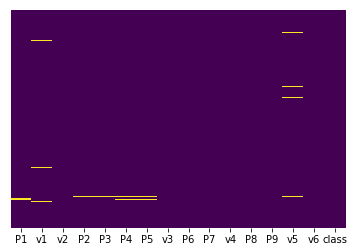

In [6]:
# we can visualize all missing data at once by using heatmap
sns.heatmap(df=='?',yticklabels=False,cbar=False,cmap='viridis')

In [7]:
# we first replace all the '?' values with numpy's NaN (Not a Number)
# we can now see missing values in .info() function too
df.replace('?',np.nan,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
P1       678 non-null object
v1       678 non-null object
v2       690 non-null float64
P2       684 non-null object
P3       684 non-null object
P4       681 non-null object
P5       681 non-null object
v3       690 non-null float64
P6       690 non-null object
P7       690 non-null object
v4       690 non-null int64
P8       690 non-null object
P9       690 non-null object
v5       677 non-null object
v6       690 non-null int64
class    690 non-null object
dtypes: float64(2), int64(2), object(12)
memory usage: 86.3+ KB


### Cleaning of Data

Here we have to deal with the missing data.

We start with the column P4 as we find there are 9 missing values. Since this column is categorical with 14 classes.
It is not a good idea to fill the null values, so we choose to drop it

In [8]:
df.dropna(subset=['P4'],axis=0,inplace=True)

In [9]:
# convert from object type to float type
df['v1']=df['v1'].astype('float')
df['v5']=df['v5'].astype('float')

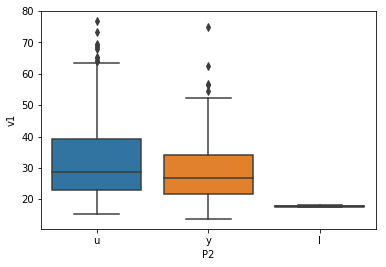

In [10]:
sns.boxplot(x='P2',y='v1',data=df)

Using seaborn for a box plot 'v1' against 'P2', we see that there seems to be some relation in the two.
Here we replace the missing values of 'v1' in reference to category of 'P2', by mean of the box/category.

In [11]:
# function to replace values in v1
def fill(arg):
    P2 = arg[0]
    v1 = arg[1]
    if pd.isnull(v1):
        if P2=='u':
            return 29
        elif P2=='y':
            return 27.5
        else:
            return 19
    else:
        return v1

In [12]:
# implement function to full column
df['v1'] = df[['P2','v1']].apply(fill,axis=1)

Next, there are few values missing in 'v5', since many of them got dropped with the drop in 'P4'.
We can either replace these values with mean, or we can drop it. In this case we will be dropping the rows, and we will drop nulls in 'P1' too.

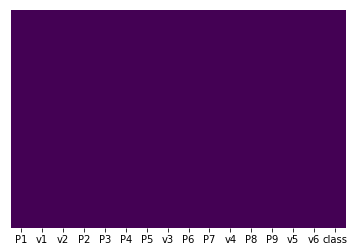

In [13]:
df.dropna(subset=['v5'],axis=0,inplace=True)
df.dropna(subset=['P1'],axis=0,inplace=True)
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Since there are no missing data left in our dataframe, we can move on to next task.

Next we convert our categorical variables to dummy variables representing some values which our machine learning model can read.

In [14]:
df['P1'] = pd.get_dummies(df['P1'],drop_first=True)
df.head()

,P1,v1,v2,P2,P3,P4,P5,v3,P6,P7,v4,P8,P9,v5,v6,class
0,1,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202.0,0,+
1,0,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560,+
2,0,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280.0,824,+
3,1,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100.0,3,+
4,1,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0,+


So, we observe that categorical column has been replaced with dummy values. Doing same with all categorical columns with two classes.

In [15]:
df['P6'] = pd.get_dummies(df['P6'],drop_first=True)
df['P7'] = pd.get_dummies(df['P7'],drop_first=True)
df['P8'] = pd.get_dummies(df['P8'],drop_first=True)
df['class'] = pd.get_dummies(df['class'],drop_first=True)

In [16]:
# dealing with multiclass categorical variables
P9_ = pd.get_dummies(df['P9'],drop_first=True)
P9_.head()

,p,s
0,0,0
1,0,0
2,0,0
3,0,0
4,0,1


In [17]:
P2_ = pd.get_dummies(df['P2'],drop_first=True)
P3_ = pd.get_dummies(df['P3'],drop_first=True)

In [18]:
# Now concatinate all dataframes to form single one
df_ = pd.concat([df,P9_,P2_,P3_],axis=1)
df_.head()

,P1,v1,v2,P2,P3,P4,P5,v3,P6,P7,...,P9,v5,v6,class,p,s,u,y,gg,p
0,1,30.83,0.000,u,g,w,v,1.25,1,1,...,g,202.0,0,0,0,0,1,0,0,0
1,0,58.67,4.460,u,g,q,h,3.04,1,1,...,g,43.0,560,0,0,0,1,0,0,0
2,0,24.50,0.500,u,g,q,h,1.50,1,0,...,g,280.0,824,0,0,0,1,0,0,0
3,1,27.83,1.540,u,g,w,v,3.75,1,1,...,g,100.0,3,0,0,0,1,0,0,0
4,1,20.17,5.625,u,g,w,v,1.71,1,0,...,s,120.0,0,0,0,1,1,0,0,0


### Data Visuaization

Now that we are done with the missing values, lets visualize some of the attributes using matplotlib and seaborn.

C:\Users\acer\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


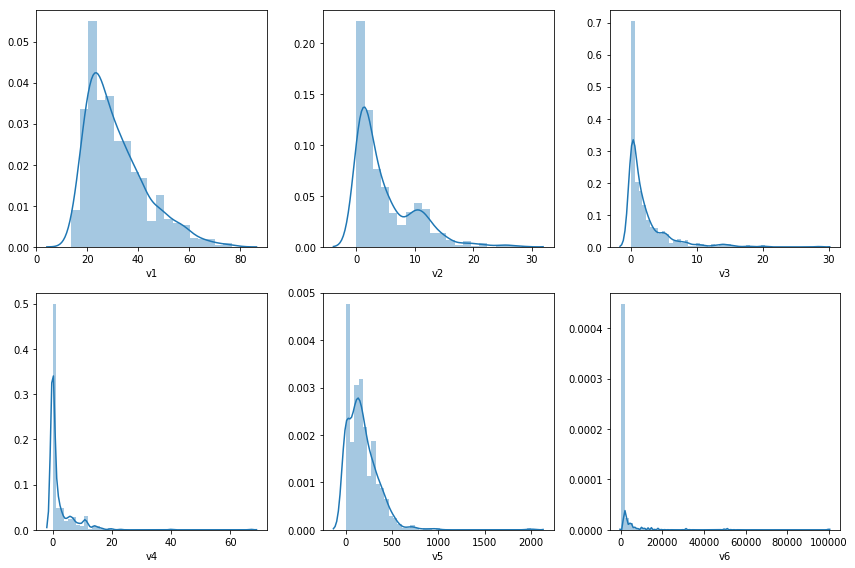

In [19]:
# using subplot to display distplots of 'v1' to 'v6' in single figure
plt.figure(figsize=(12,8))
plt.subplot(2,3,1)
sns.distplot(df['v1'])
plt.subplot(2,3,2)
sns.distplot(df['v2'])
plt.subplot(2,3,3)
sns.distplot(df['v3'])
plt.subplot(2,3,4)
sns.distplot(df['v4'])
plt.subplot(2,3,5)
sns.distplot(df['v5'])
plt.subplot(2,3,6)
sns.distplot(df['v6'])
plt.tight_layout()           # to ensure proper spacing between figures

In the above distribution plots, we see v1, v2 and v3 have proper distribution and thus they seem to be important attributes for the classfication.
Now, as we move on, v4 and v6 do not show proper distribution and more concentrated in the smaller range, considering they will not affect the end result to much extent, we would ignore these columns.

also if we take a look at v5, though it seems continuous, most of the values are repeated in the class, it may some kind of 5-digit number alotted to customers based on some other feature, as long as it is depending on some other feature, we can drop this column too.

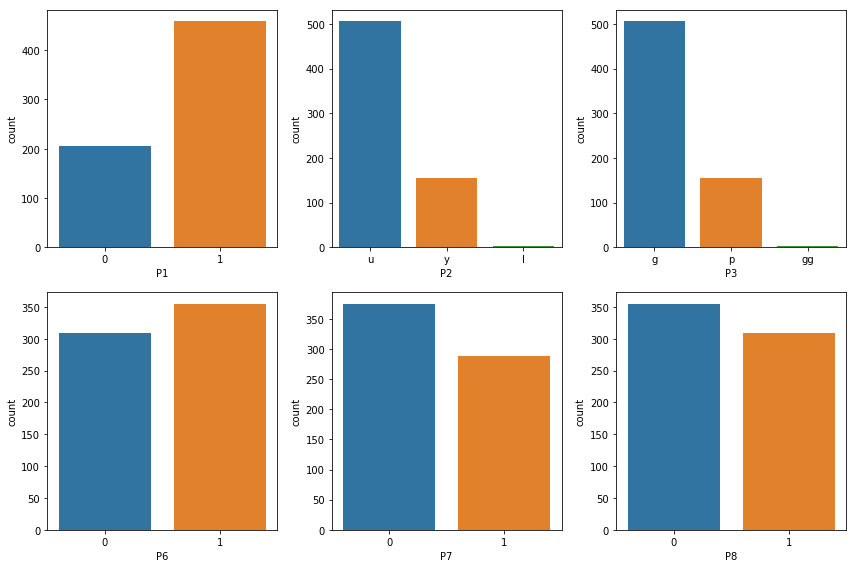

In [20]:
plt.figure(figsize=(12,8))
plt.subplot(2,3,1)
sns.countplot(x='P1',data=df)
plt.subplot(2,3,2)
sns.countplot(x='P2',data=df)
plt.subplot(2,3,3)
sns.countplot(x='P3',data=df)
plt.subplot(2,3,4)
sns.countplot(x='P6',data=df)
plt.subplot(2,3,5)
sns.countplot(x='P7',data=df)
plt.subplot(2,3,6)
sns.countplot(x='P8',data=df)
plt.tight_layout()

We have also dropped columns P4 and P5 since they contain large number of categorical classes, decoding it to dummies would increase the number of features immensely.

In [22]:
df_.columns

Index(['P1', 'v1', 'v2', 'P2', 'P3', 'P4', 'P5', 'v3', 'P6', 'P7', 'v4', 'P8',
       'P9', 'v5', 'v6', 'class', 'p', 's', 'u', 'y', 'gg', 'p'],
      dtype='object')

### Train-test split

We seprate data in train and test set.

We will include only important features in X class.

In [23]:
from sklearn.model_selection import train_test_split

In [25]:
X_ = df_[['P1', 'v1', 'v2', 'v3', 'v4', 'P6', 'P7', 'P8', 'p', 's', 'u', 'y', 'gg', 'p']]
y_ = df_['class']
X_train_, X_test_, y_train_, y_test_ = train_test_split(X_, y_, test_size=0.30, random_state=40)

In [26]:
from sklearn.linear_model import LogisticRegression

In [27]:
LR = LogisticRegression()

In [28]:
LR.fit(X_train_,y_train_)
pred_ = LR.predict(X_test_)

In [29]:
from sklearn.metrics import confusion_matrix,classification_report

In [30]:
print(confusion_matrix(y_test_,pred_))
print('\n')
print(classification_report(y_test_,pred_))

[[78  9]
 [19 94]]


             precision    recall  f1-score   support

          0       0.80      0.90      0.85        87
          1       0.91      0.83      0.87       113

avg / total       0.87      0.86      0.86       200



We can achieve accuracy of 85-88% by variation in the test split random state